In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data\.DS_Store
../data\explor.ipynb
../data\heart-failure.csv


In [2]:
# Load data
data = pd.read_csv("heart-failure.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Get some information about training data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

# Handling missing data (if any)

- checking, whether we can use the provided data set without adjustments.
- including test data, to see if we need to get rid of any test obs.

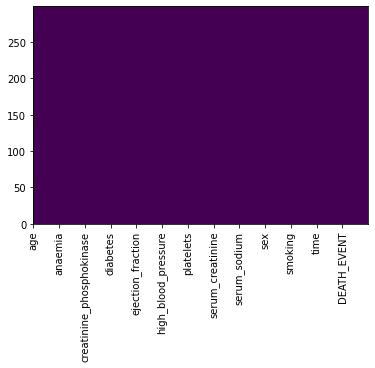

In [7]:
# Looking for missing data on train dataset
plt.pcolor(data.isnull())
plt.xticks(np.arange(0.0, len(data.columns), 1), data.columns, rotation='vertical')
plt.show()

**MISSING VALUES ON NUMERICAL FEATURES**

In [8]:
list(data.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

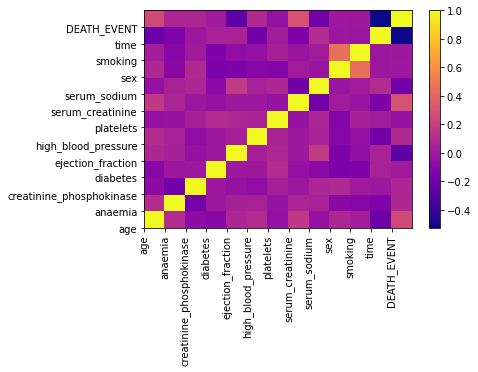

In [9]:
# Correlation between survived and other data
numerical_features = list(data.columns)
plt.pcolor(data.corr(), cmap='plasma')
plt.xticks(np.arange(0, len(numerical_features)), numerical_features, rotation='vertical')
plt.yticks(np.arange(0, len(numerical_features)), numerical_features)
plt.colorbar()
plt.show()

In [15]:
y = data.pop('DEATH_EVENT')
y

KeyError: 'DEATH_EVENT'

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

# run a Logit for classification purposes using the args given by args-parse
model = LogisticRegression(C=1, max_iter=100).fit(x_train, y_train)

accuracy = model.score(x_test, y_test)

In [31]:
model.predict_proba(x_test)[:,1]

array([0.23153799, 0.09865615, 0.26387696, 0.37921678, 0.34152034,
       0.13820238, 0.02999034, 0.06202259, 0.18769092, 0.10447272,
       0.22076302, 0.04168415, 0.09087002, 0.79124338, 0.58703055,
       0.30172315, 0.24400876, 0.01369415, 0.21807655, 0.02371501,
       0.14071339, 0.11078376, 0.12719253, 0.01507227, 0.00304866,
       0.00126492, 0.8729648 , 0.92863883, 0.72193933, 0.49728967,
       0.11647003, 0.03201096, 0.8650731 , 0.6870236 , 0.57301157,
       0.02720853, 0.07811034, 0.3493957 , 0.10448212, 0.6527294 ,
       0.76548617, 0.91077367, 0.77273743, 0.10450386, 0.02313683,
       0.8007838 , 0.05537986, 0.14752932, 0.25018668, 0.14923679,
       0.13015384, 0.01890604, 0.55967956, 0.89417735, 0.60685992,
       0.42134211, 0.03989312, 0.88424234, 0.01333322, 0.06134251])

In [34]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1], average='weighted')
auc

0.9210526315789473

In [20]:
from sklearn.metrics import fbeta_score

y_pred = model.predict(x_test)
f2 = fbeta_score(y_test, y_pred, average='macro', beta=0.5)

print(f"acc: {accuracy}\nf2: {f2}")

acc: 0.9166666666666666
f2: 0.9246031746031746


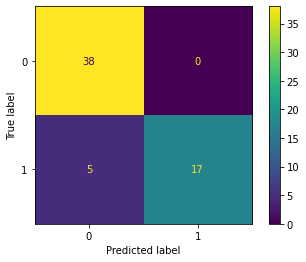

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [38]:
x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
153,50.000,0,1846,1,35,0,263358.03,1.18,137,1,1,119
208,60.000,1,2281,1,40,0,283000.00,1.00,141,0,0,187
79,55.000,0,336,0,45,1,324000.00,0.90,140,0,0,74
158,85.000,1,910,0,50,0,235000.00,1.30,134,1,0,121
122,60.000,0,96,1,38,0,228000.00,0.75,140,0,0,95
159,59.000,1,129,0,45,1,362000.00,1.10,139,1,1,121
267,56.000,1,135,1,38,0,133000.00,1.70,140,1,0,244
213,48.000,1,131,1,30,1,244000.00,1.60,130,0,0,193
156,52.000,1,58,0,35,0,277000.00,1.40,136,0,0,120
243,73.000,1,1185,0,40,1,220000.00,0.90,141,0,0,213
